# TP2

In [ ]:
# Números y Datos
import numpy as np
import pandas as pd

# Para visuzalización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import community
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

from sklearn.metrics import adjusted_rand_score
from scipy import stats
import random

plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-deep')

## Carga de Datos

In [ ]:
#Genero las rutas para leer los archivos
path = "https://raw.githubusercontent.com/jkamienkowski/dmcyt_tp2/master/tp2/DataSujetos/"
estadios = ["W","N1","N2","N3"]

sujetos = {}

for i in range(1,19):
    sujeto = {}
        for e in estadios:
            current_path = path + e + "_suj" + str(i) + ".csv"
            data = pd.read_csv(current_path,sep=',',header=None)
            sujeto[e] = data
    sujetos[i] = sujeto


## Tarea 1: Visualización

Se calculan los promedios para cada uno de los estadíos del sueño.  
Se guardan en __promedios[e]__

In [ ]:
# Calculo los promedios
promedios = {}

for e in estadios:
    promedios[e] = sujetos[1][e].copy() / 18

for i in range(2,19):
    for e in estadios:
        promedios[e] += sujetos[i][e] / 18

Se visualiza la estructura de las redes pesadas a partir de
los datos promedio para cada estadío del sueño

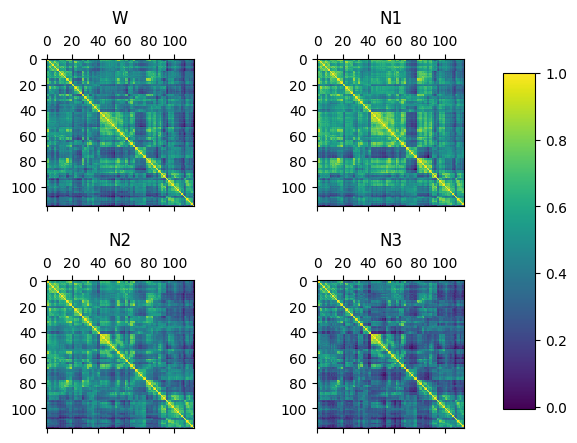

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0][0].matshow(promedios["W"])
axes[0][0].set_title("W", pad=20.0)

axes[0][1].matshow(promedios["N1"])
axes[0][1].set_title("N1", pad=20.0)

axes[1][0].matshow(promedios["N2"])
axes[1][0].set_title("N2", pad=20.0)

im = axes[1][1].matshow(promedios["N3"])
axes[1][1].set_title("N3", pad=20.0)

fig.subplots_adjust(hspace = 0.5)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

Sobre los datos promedio, se extraen medidas de centralidad, grado, camino
mínimo, y coeficiente de clustering en función de la densidad de aristas en función de δ

Usamos hasta 0.4 de densidad ya que con valores más grandes no se obtiene un grafo conectado y muchas de las medidas pierden el sentido


In [ ]:
def dictionary_mean(dictionary):
    return np.mean([x for x in dictionary.values()])

u_vector = []

average_degree = {}
eccentricity = {}
closeness = {}
betweenness = {}
eigenvector = {}
radius = {}
average_clustering = {}

for e in estadios:
    average_degree[e] = []
    eccentricity[e] = []
    closeness[e] = []
    betweenness[e] = []
    eigenvector[e] = []
    radius[e] = []
    average_clustering[e] = []

for u in np.arange(0.0,0.4001,0.025):
    u_vector.append(u)

    for e in estadios:
        G = nx.from_pandas_adjacency(promedios[e] > u)

        average_degree[e].append(dictionary_mean(nx.degree_centrality(G)))
        eccentricity[e].append(dictionary_mean(nx.eccentricity(G)))
        closeness[e].append(dictionary_mean(nx.closeness_centrality(G)))
        betweenness[e].append(dictionary_mean(nx.betweenness_centrality(G)))
        eigenvector[e].append(dictionary_mean(nx.eigenvector_centrality(G)))
        radius[e].append(nx.radius(G))
        average_clustering[e].append(nx.average_clustering(G))


Visualizamos esos valores obtenidos

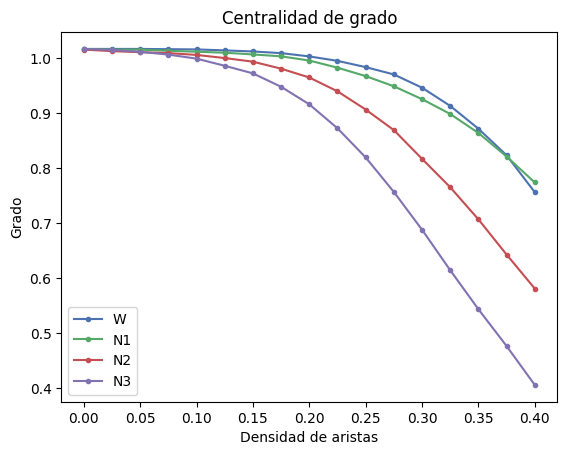

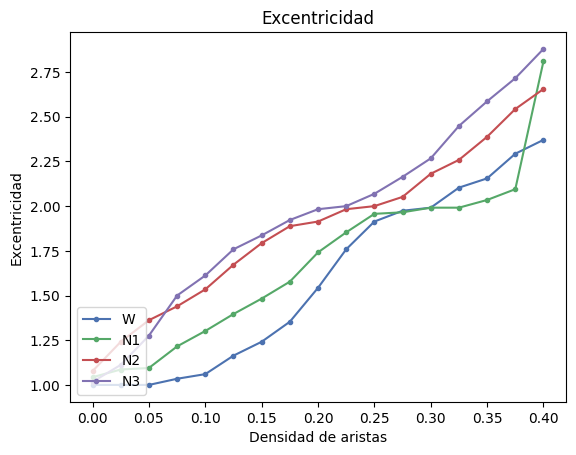

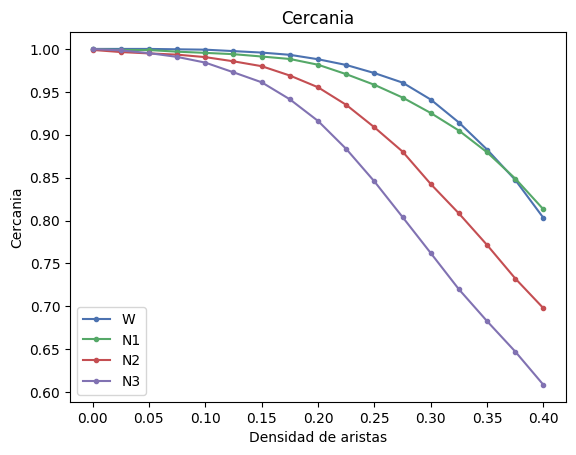

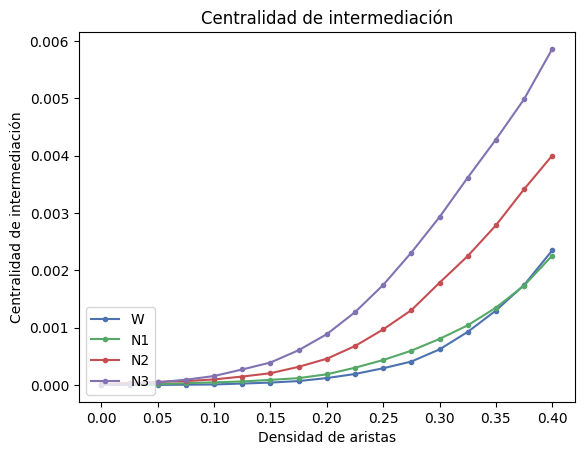

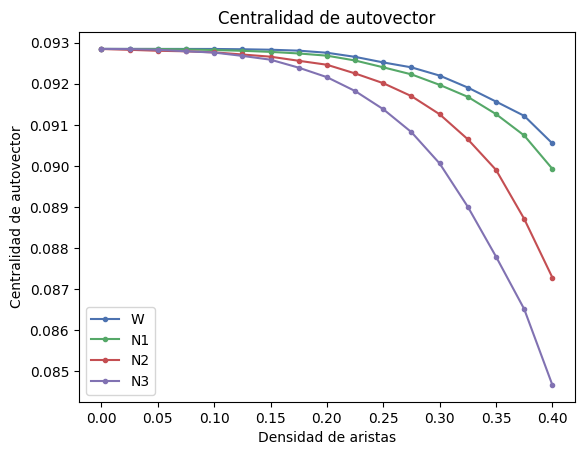

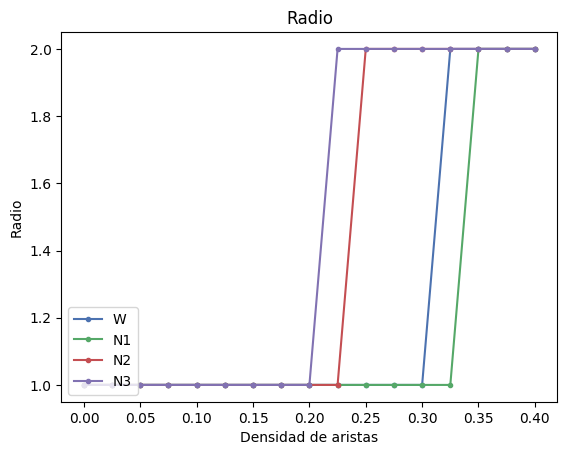

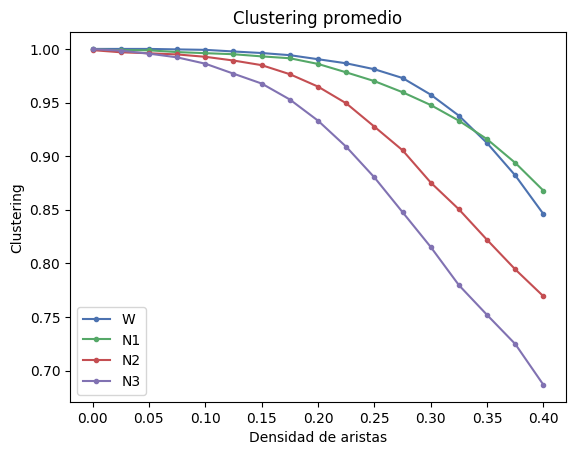

In [ ]:
def graficar_propiedad(clases, valores, u_vector, titulo, tit_x, tit_y):
    for e in clases:
        plt.plot(u_vector,valores[e],'.-', label = e)
    plt.xlabel(tit_x)
    plt.ylabel(tit_y)
    plt.title(titulo)
    plt.legend(loc='lower left')
    plt.show()

graficar_propiedad(estadios, average_degree, u_vector, "Centralidad de grado", "Densidad de aristas", "Grado")
graficar_propiedad(estadios, eccentricity, u_vector, "Excentricidad", "Densidad de aristas", "Excentricidad")
graficar_propiedad(estadios, closeness, u_vector, "Cercania", "Densidad de aristas", "Cercania")
graficar_propiedad(estadios, betweenness, u_vector, "Centralidad de intermediación", "Densidad de aristas", "Centralidad de intermediación")
graficar_propiedad(estadios, eigenvector, u_vector, "Centralidad de autovector", "Densidad de aristas", "Centralidad de autovector")

graficar_propiedad(estadios, radius, u_vector, "Radio", "Densidad de aristas", "Radio")
graficar_propiedad(estadios, average_clustering, u_vector, "Clustering promedio", "Densidad de aristas", "Clustering")

Se visualiza el grafo no pesado para distintos valores de δ que resulten interesantes.

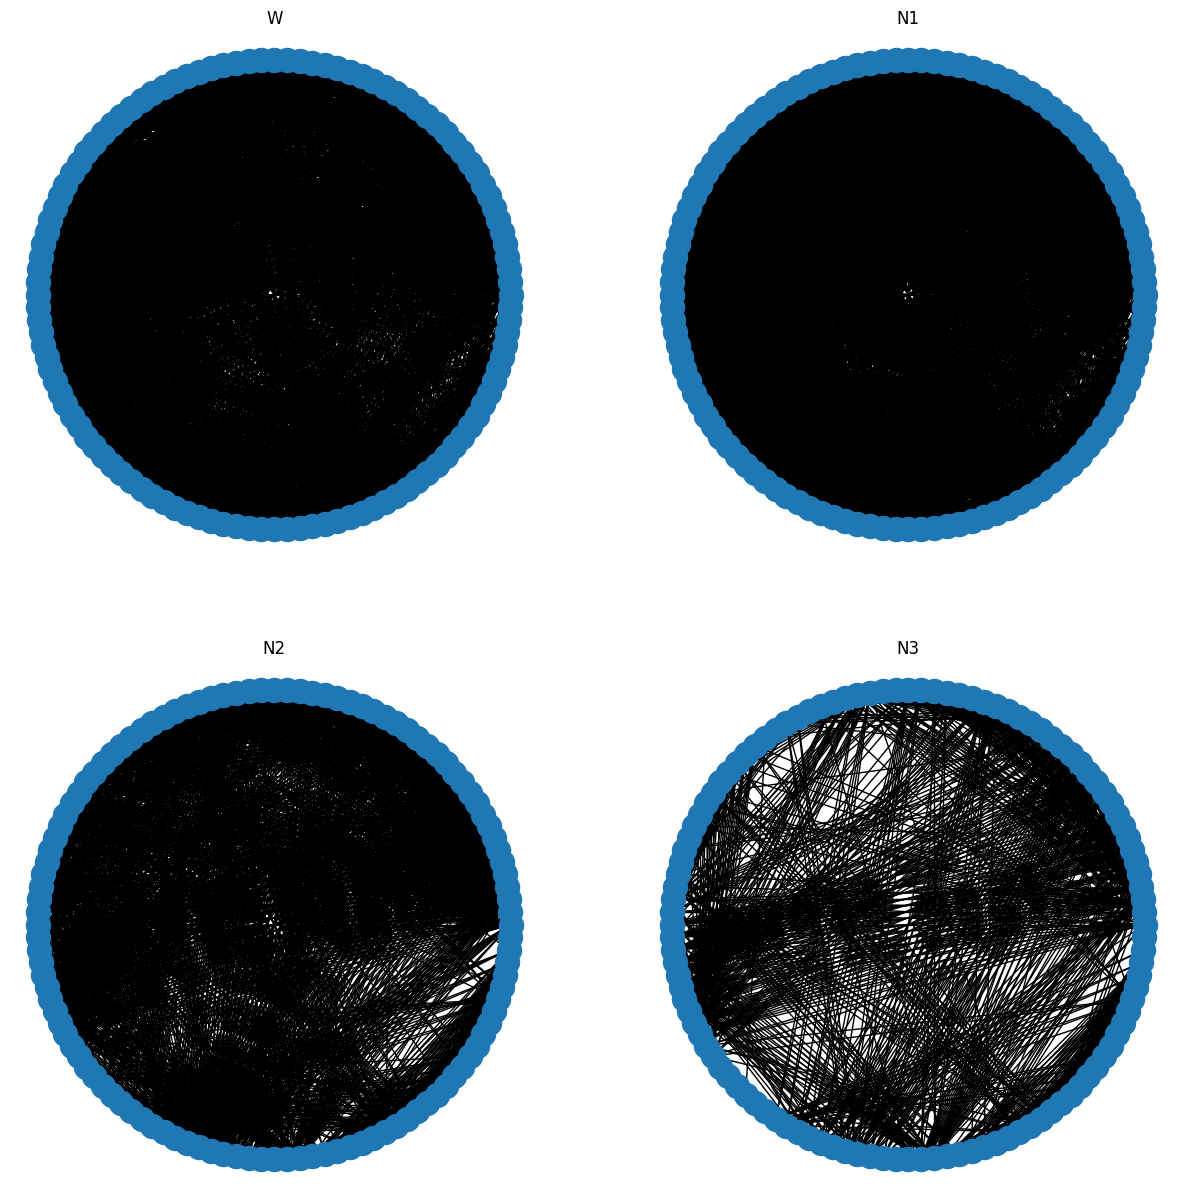

In [ ]:
plot_shape = [221,222,223,224]

plt.figure(figsize=(15,15))

for i in range(4):
    G = nx.from_pandas_adjacency(promedios[estadios[i]] > 0.5 )


    layout = nx.circular_layout(G)
    p = plt.subplot(plot_shape[i])
    p.title.set_text(estadios[i])
    nx.draw(G,layout)

En forma circular, tomando una densidad mayor se ve más claro que mientras mayor el estado de sueño, menos conectados están los nodos

Algunas características para la densidad de 0.5 elegida

In [ ]:
for i in range(4):
    G = nx.from_pandas_adjacency(promedios[estadios[i]] > 0.5 )
    print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 116
Number of edges: 3033
Average degree:  52.2931
Name: 
Type: Graph
Number of nodes: 116
Number of edges: 3706
Average degree:  63.8966
Name: 
Type: Graph
Number of nodes: 116
Number of edges: 2283
Average degree:  39.3621
Name: 
Type: Graph
Number of nodes: 116
Number of edges: 1353
Average degree:  23.3276


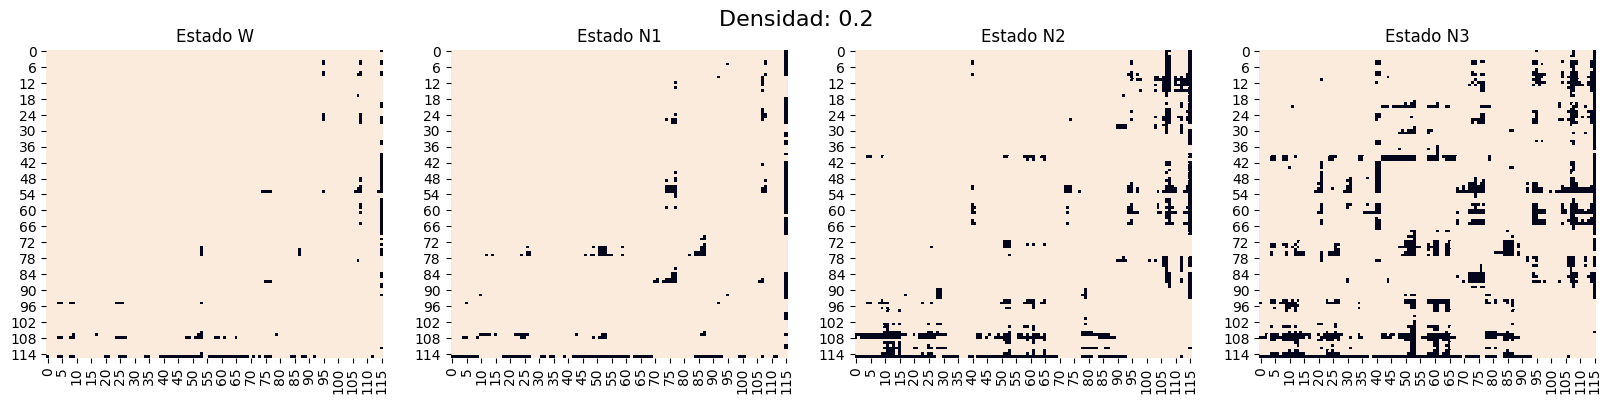

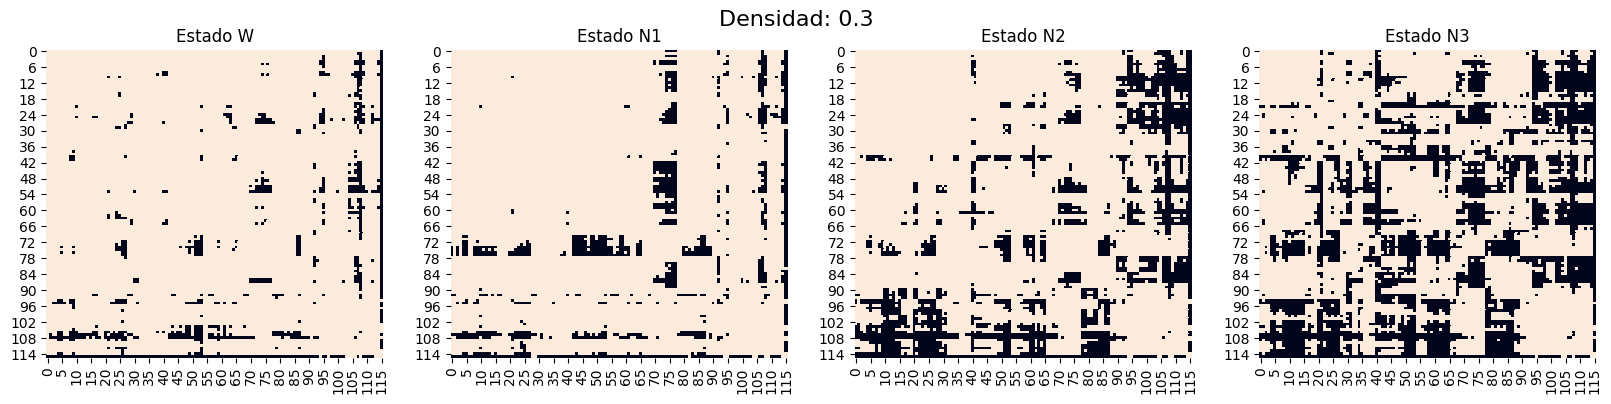

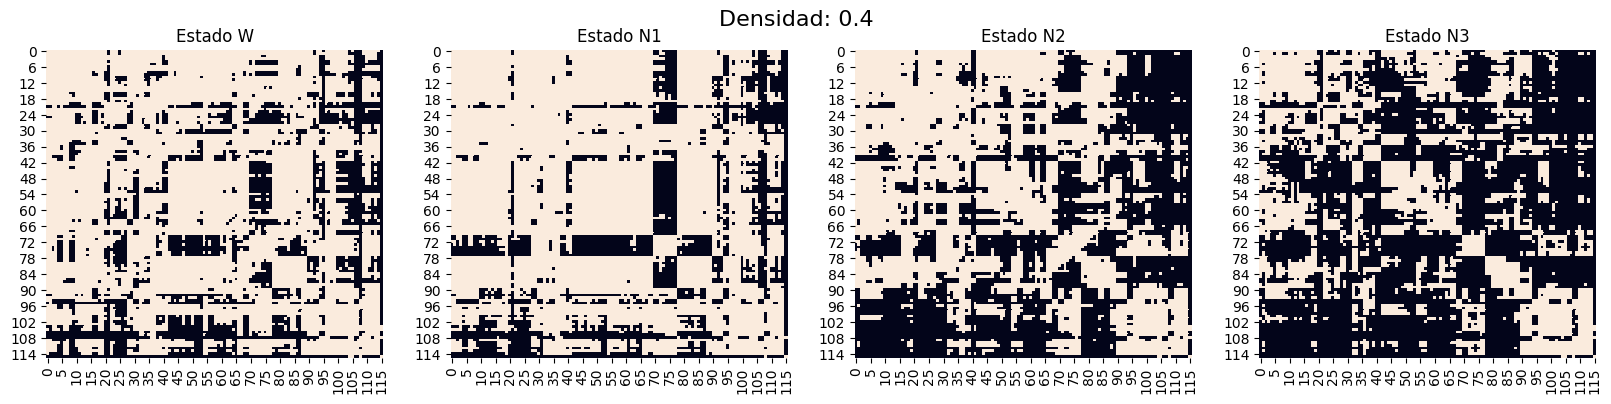

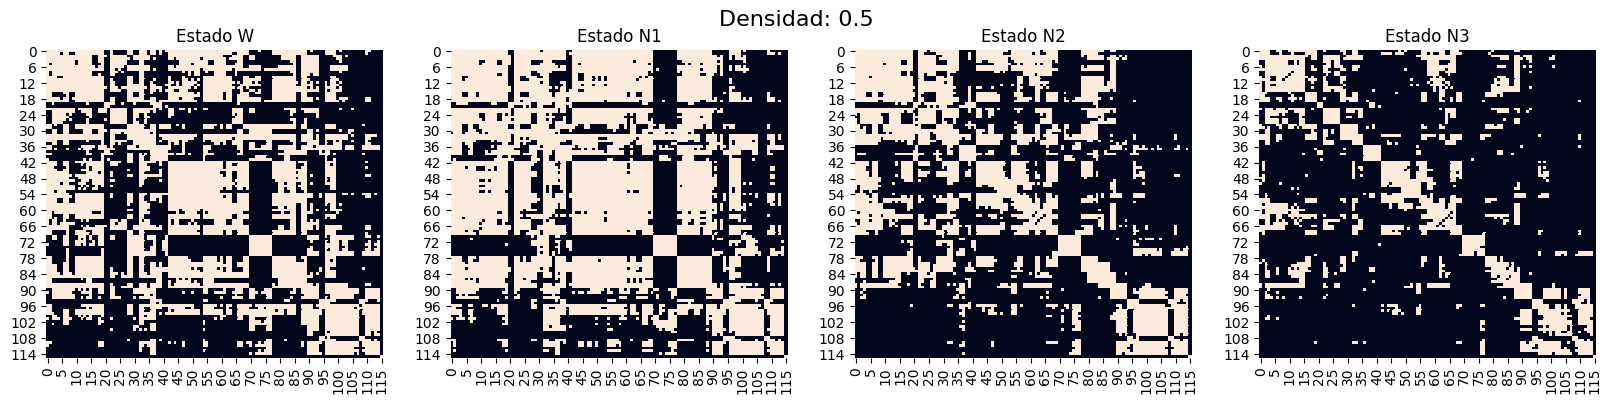

In [ ]:
plot_shape = [141,142,143,144]
densidades = [0.2,0.3,0.4,0.5]

for j in range(len(densidades)):

    plt.figure(figsize=(20,4))
    plt.suptitle("Densidad: " + str(densidades[j]), fontsize=16)

    for i in range(len(estadios)):
        p = plt.subplot(plot_shape[i])
        p.title.set_text("Estado " + str(estadios[i]))
        sns.heatmap(promedios[estadios[i]] >= densidades[j], cbar=False)
    
    plt.show()

## Tarea 2: Comunidades y coeficiente de modularidad

Para los distintos valores de la densidad de aristas (δ), determinar comunidades a partir de algoritmo de Louvain

In [ ]:
comunidades = {}
modularity = {}

for e in estadios:
    comunidades[e] = []
    modularity[e] = []

for u in np.arange(0.0,0.4001,0.025):
    for e in estadios:
        G = nx.from_pandas_adjacency(promedios[e] > u )
        best_partition = community.best_partition(G) #Louvain 
        ids_comunidades = np.unique([x for x in best_partition.values()])

        comunidades[e].append(len(ids_comunidades))
        modularity[e].append(community.modularity(best_partition,G))

Graficamos el coeficiente de modularidad y el número de comunidades en función de la densidad de aristas

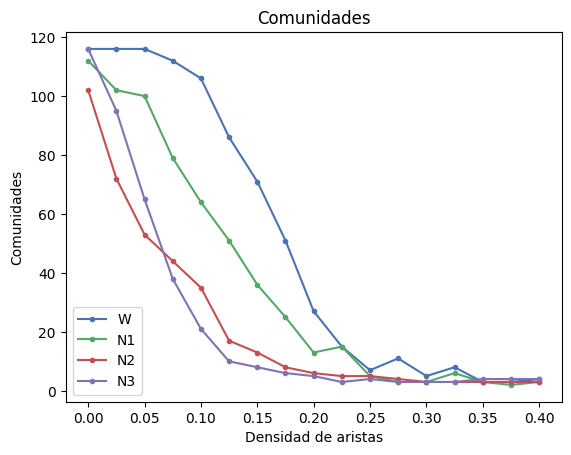

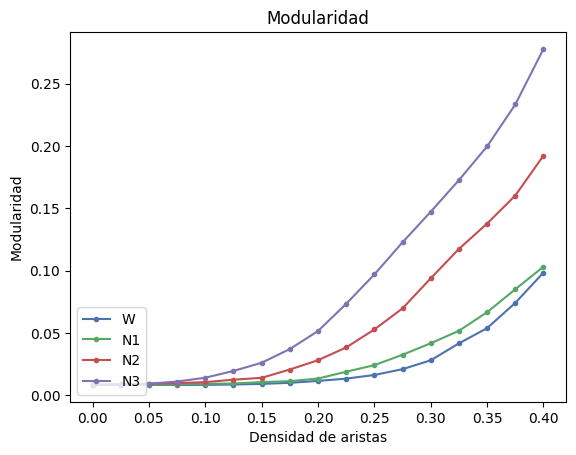

In [ ]:
graficar_propiedad(estadios, comunidades, "Comunidades", "Densidad de aristas", "Comunidades")
graficar_propiedad(estadios, modularity, "Modularidad", "Densidad de aristas", "Modularidad")

Comparar los resultados con el comportamiento de una red random que preserve la distribución de grados de los nodos 

In [ ]:
N = 116
randomAdjacency = pd.DataFrame([[random.random() for i in range(N)] for j in range(N)])
comunidades_random = []
modularity_random = []

for u in np.arange(0.0,0.4001,0.025):
    G = nx.from_pandas_adjacency(randomAdjacency > u )
    best_partition = community.best_partition(G) #Louvain 
    ids_comunidades = np.unique([x for x in best_partition.values()])
    
    comunidades_random.append(len(ids_comunidades))
    modularity_random.append(community.modularity(best_partition,G))

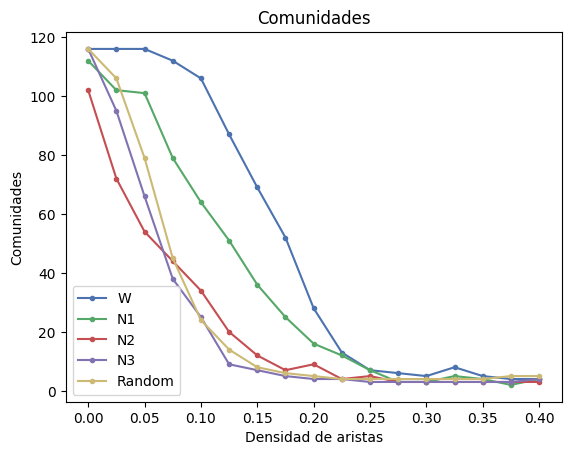

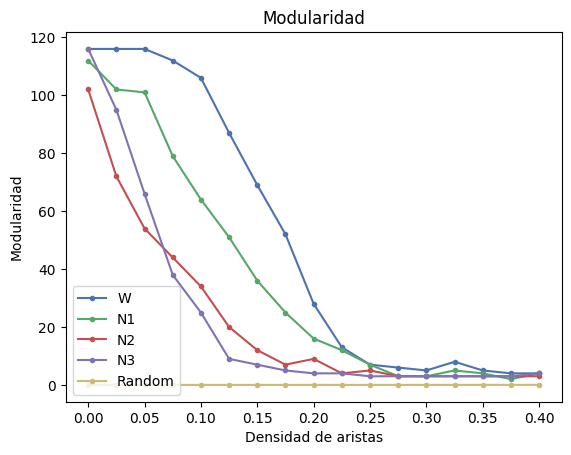

In [ ]:
def graphRandom(clases, valores, randomValores, titulo, tit_x, tit_y):
    for e in clases:
        plt.plot(u_vector,valores[e],'.-', label = e)
    plt.plot(u_vector,randomValores,'.-', label = "Random")
    plt.xlabel(tit_x)
    plt.ylabel(tit_y)
    plt.title(titulo)
    plt.legend(loc='lower left')
    plt.show()

graphRandom(estadios, comunidades, comunidades_random, "Comunidades", "Densidad de aristas", "Comunidades")
graphRandom(estadios, comunidades, modularity_random, "Modularidad", "Densidad de aristas", "Modularidad")

## Tarea 3: Estadística

Repetir las curvas de modularidad (Q) y número de comunidades (N C) para cada sujeto y estadio del sueño, en función de δ, y comparar cada estadio N1, N2 y N3, con el estadio
despierto W. 
Para cada valor de δ incluir una noción de significancia entre estadíos del sueño.


In [ ]:
comunidades_sujeto = {}
modularity_sujeto = {}

#Inicializo los diccionarios vacíos
for i in range(1,len(sujetos)+1):
    comunidades_sujeto[i] = {}
    modularity_sujeto[i] = {}
    for e in estadios:
        comunidades_sujeto[i][e] = []
        modularity_sujeto[i][e] = []

#Calculo las comunidades y las modularidades para cada individuo y cada densidad
u_vector = []
for u in np.arange(0.0,0.4001,0.025):
    u_vector.append(u)
        
    for i in range(1,len(sujetos)+1):
        for e in estadios:
            G = nx.from_pandas_adjacency(sujetos[i][e] > u )
            best_partition = community.best_partition(G)
            ids_comunidades = np.unique([x for x in best_partition.values()])

            comunidades_sujeto[i][e].append(len(ids_comunidades))
            modularity_sujeto[i][e].append(community.modularity(best_partition,G))

In [ ]:
#Valores para construir el subplot
sub_plot_matrix_18 = []

for y in range(6):
    for x in range(3):
        sub_plot_matrix_18.append(((6,3), (y,x)))

In [ ]:
def graficar_matriz_propiedad(u_vector, clases, valores_sujeto, sub_plot_matrix, titulo, tit_x, tit_y):
    plt.figure(figsize=(20,25))
    plt.suptitle(titulo, fontsize=16,x = 0.5, y = 0.9)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
    
    for i in range(len(sub_plot_matrix)):
        p = plt.subplot2grid(sub_plot_matrix[i][0],sub_plot_matrix[i][1])
        
        valores = valores_sujeto[i + 1]
        
        for e in clases:
            p.plot(u_vector,valores[e],'.-', label = e)

        p.set_xlabel(tit_x)
        p.set_ylabel(tit_y)

        p.title.set_text("Sujeto: " + str(i + 1))
        p.legend(loc='upper right')
    plt.show()

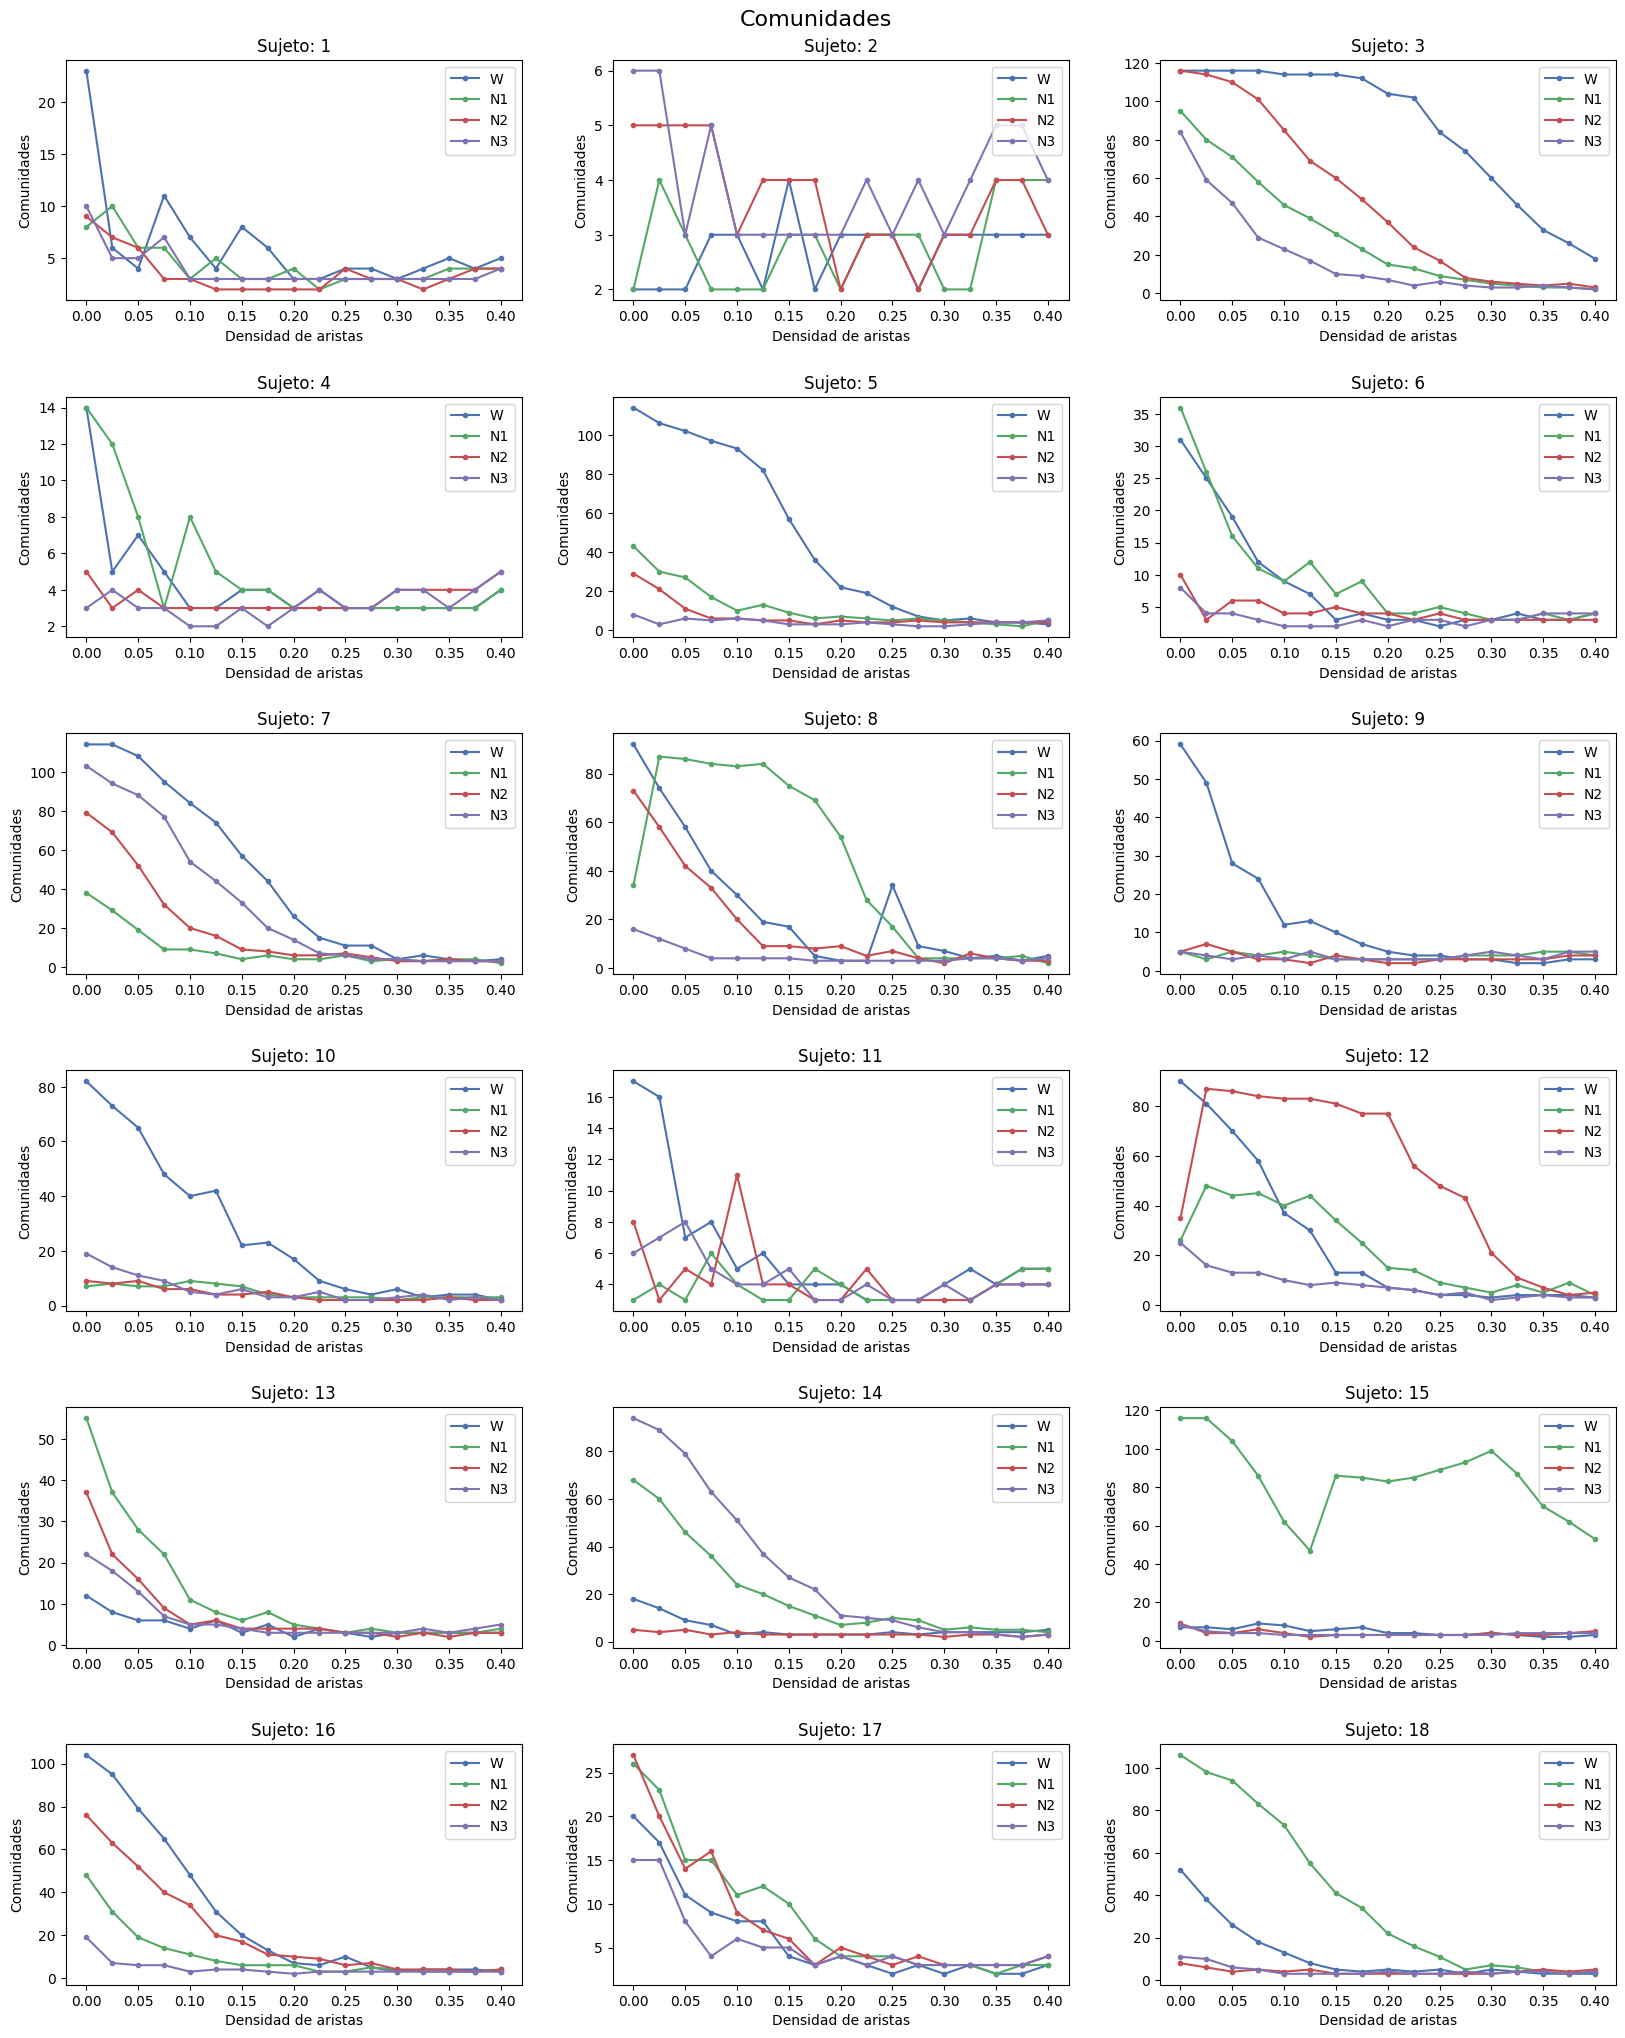

In [ ]:
graficar_matriz_propiedad(u_vector, estadios, comunidades_sujeto, sub_plot_matrix_18, "Comunidades", "Densidad de aristas", "Comunidades")

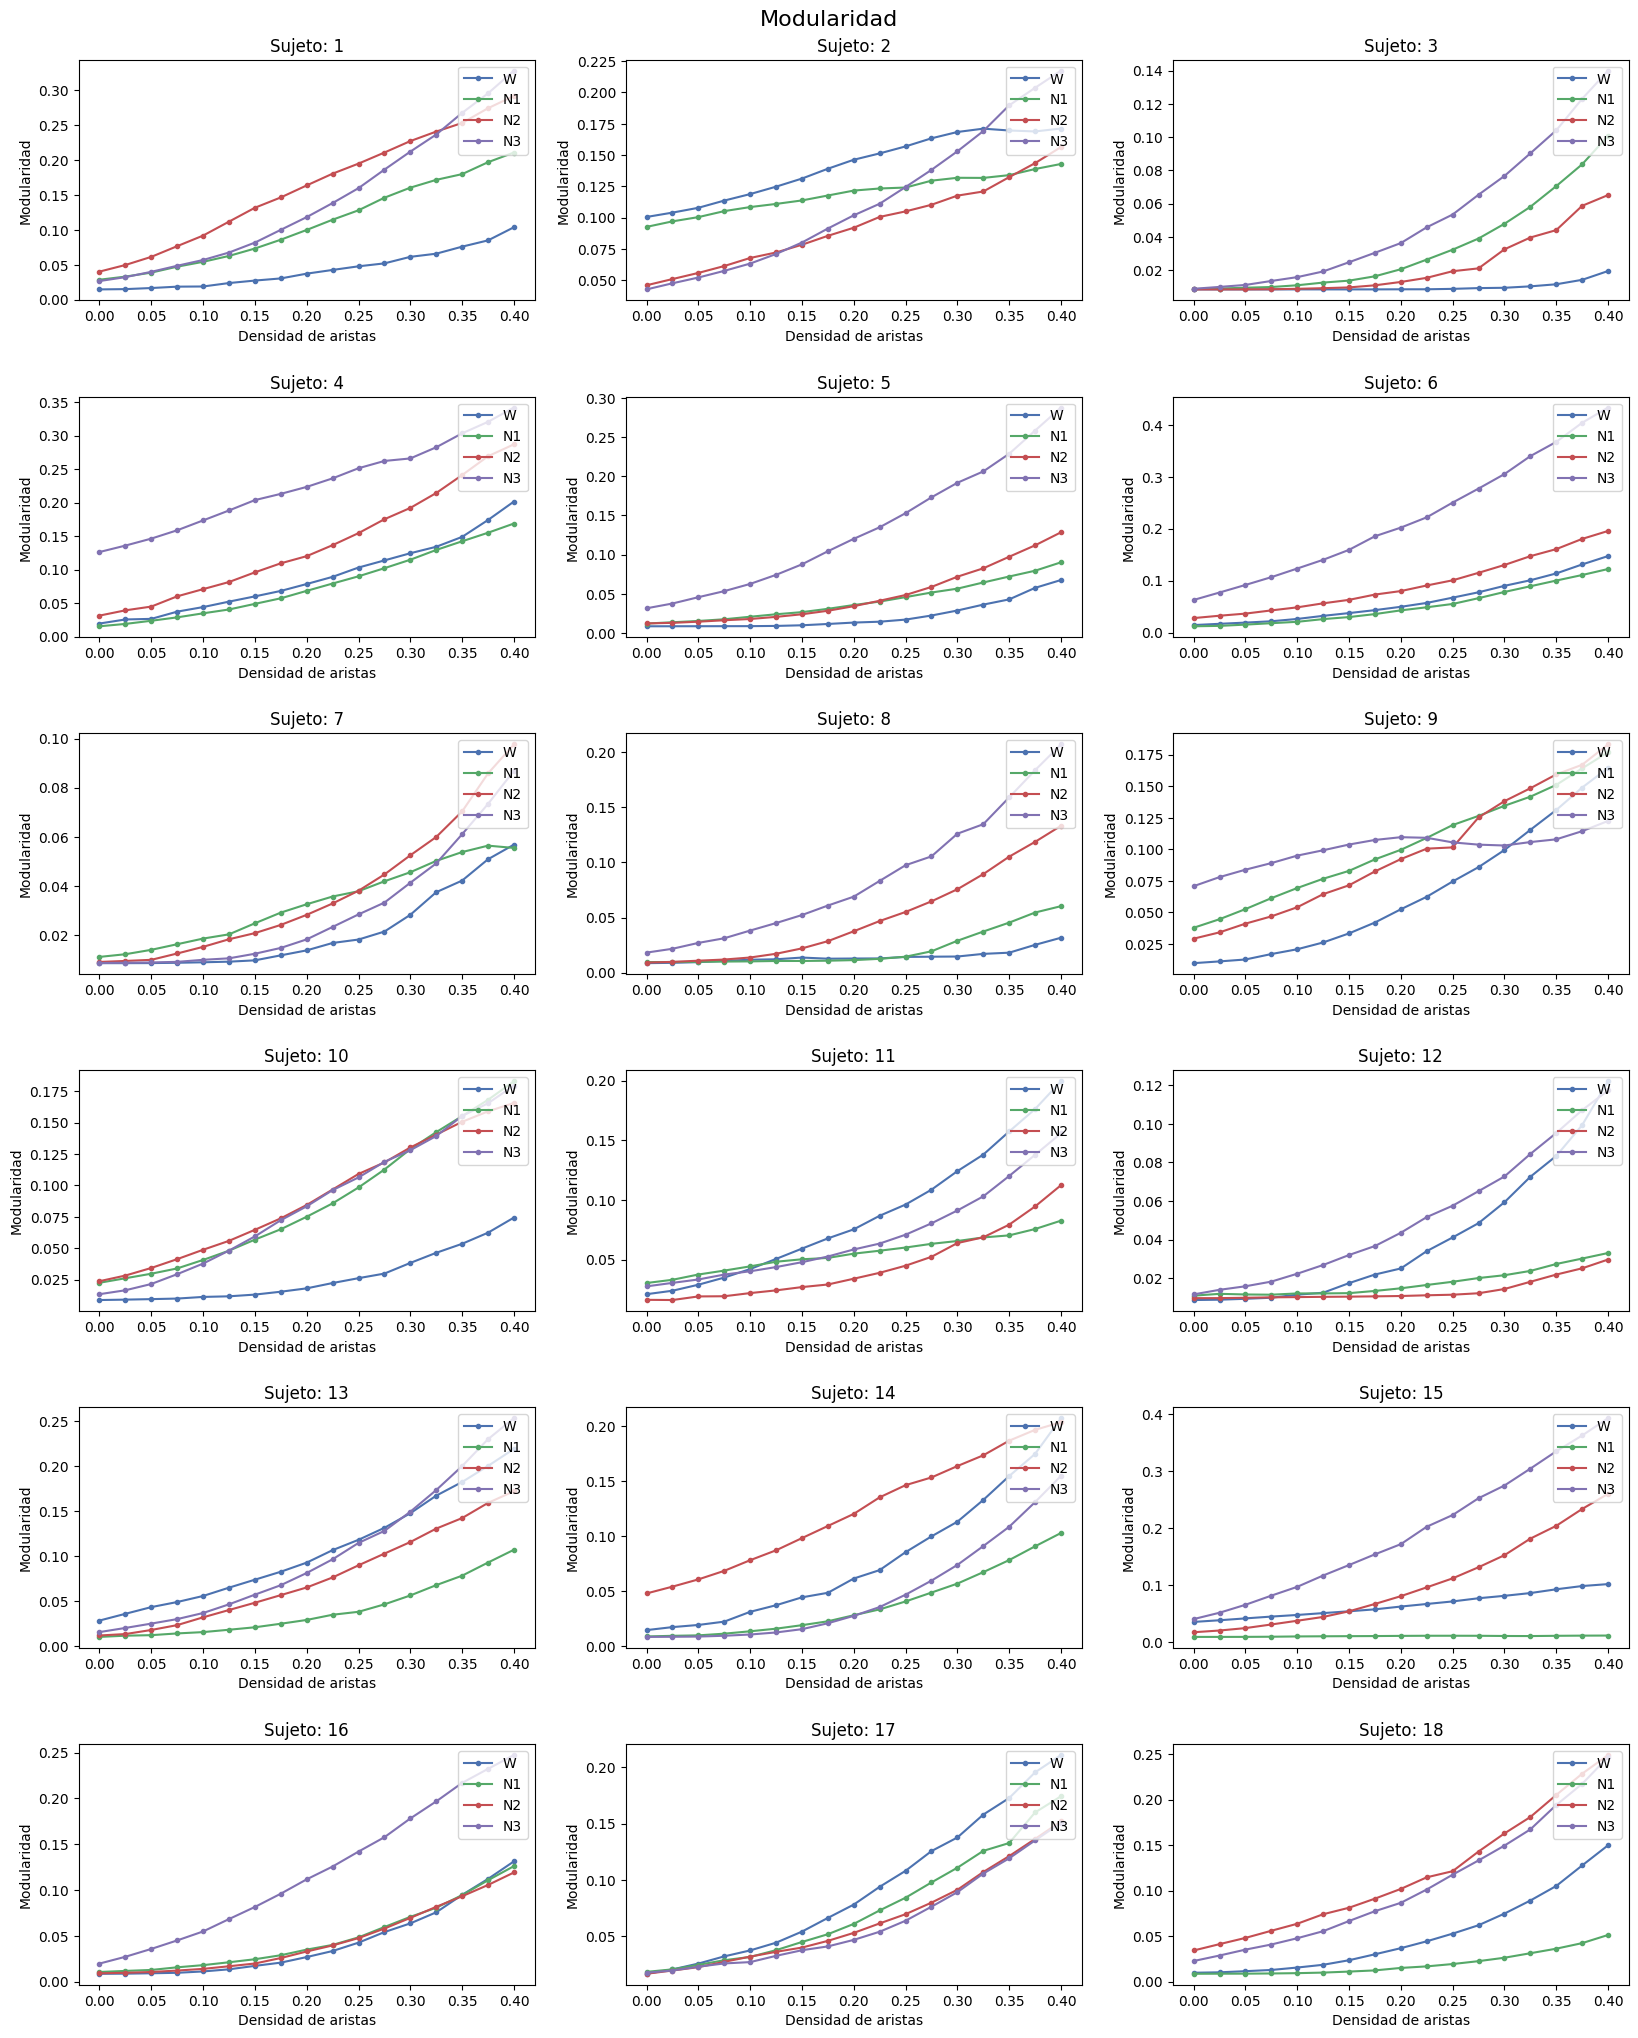

In [ ]:
graficar_matriz_propiedad(u_vector, estadios, modularity_sujeto, sub_plot_matrix_18, "Modularidad", "Densidad de aristas", "Modularidad")

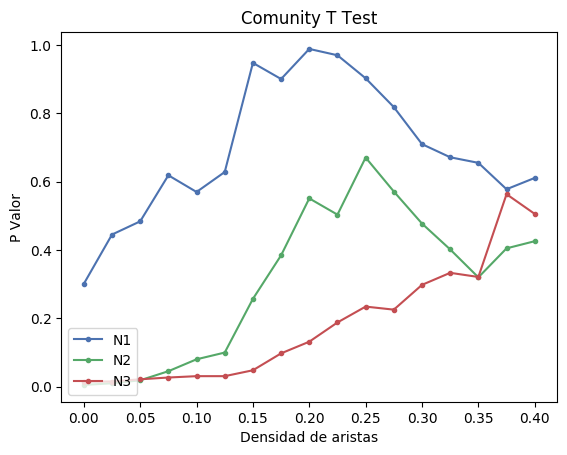

In [ ]:
restas = {}

for u in u_vector:
    restas[u] = {}
    for e in range(1,4):
        restas[u][estadios[e]] = []

        
for i in range(1,19):
    sujeto_w = comunidades_sujeto[i][estadios[0]]
    
    for j in range(len(u_vector)):
        for e in range(1,4):
            restas[u_vector[j]][estadios[e]].append(comunidades_sujeto[i][estadios[e]][j] - sujeto_w[j])


p_valores = {}

for e in range(1,4):
    p_valores[estadios[e]] = []
    for u in u_vector:
        pvalue = stats.ttest_1samp(restas[u][estadios[e]], 0.0)[1]
        p_valores[estadios[e]].append(pvalue)
        

graficar_propiedad(estadios[1:4], p_valores, "Comunity T Test", "Densidad de aristas", "P Valor")

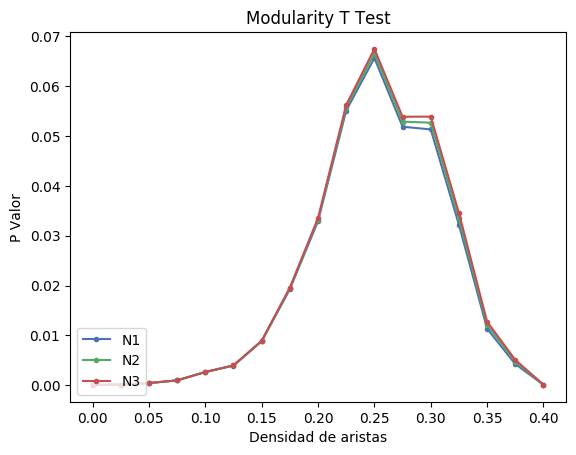

In [ ]:
restas = {}

for u in u_vector:
    restas[u] = {}
    for e in range(1,4):
        restas[u][estadios[e]] = []

        
for i in range(1,19):
    sujeto_w = comunidades_sujeto[i][estadios[0]]
    
    for j in range(len(u_vector)):
        for e in range(1,4):
            restas[u_vector[j]][estadios[e]].append(modularity_sujeto[i][estadios[e]][j] - sujeto_w[j])


p_valores = {}

for e in range(1,4):
    p_valores[estadios[e]] = []
    for u in u_vector:
        pvalue = stats.ttest_1samp(restas[u][estadios[e]], 0.0)[1]
        p_valores[estadios[e]].append(pvalue)
        

graficar_propiedad(estadios[1:4], p_valores, "Modularity T Test", "Densidad de aristas", "P Valor")

## Tarea 4: Diferencias en la membresía para los diferentes estadíos

Para identificar diferencias significativas globales en la membresía de los nodos entre los distintos estadíos del sueño (N1, N2 y N3), con el estadio despierto (W) se propone seguir el procedimiento propuesto por Alexander-Bloch y colaboradores [Alexander-Bloch et al., 2012].
Para cada par NX y W se calcula la similaridad entre grupos a partir de Índice de Rand ajustado (adjusted-for-chance Rand index), y el valor promedio se compara con Np permutaciones de las etiquetas de comunidades para cada estadío. El p-valor se obtiene dividiendo el número de veces en que una permutación supera el valor promedio para los datos no permutados por el número total de permutaciones (Np).


In [ ]:
densities = np.linspace(0,1,50)

def subjectmatrix2graphslist(correlation_matrix, densities):
    n = correlation_matrix.shape[0]
    n2m1 = n*(n-1)
    correlation_matrix -= np.diag(np.ones(n))
    sorted_correlations = sorted(correlation_matrix.values.flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*n2m1)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

#Cargo los grafos
graphs = {}
for estadio in estadios:
    graphs[estadio] = {}
    for i in range(1,19):
        graphs[estadio][i] = subjectmatrix2graphslist(sujetos[i][estadio], densities)
    

In [ ]:
cantidad_permutaciones = 100

#Función para calcular rand entre particiones
def rand_within(particiones):

    rand_original = []
    for i in range(0, (len(particiones)-1)):
        vi = particiones[i, :]    
        for j in range((i+1), len(particiones)):
            vj = particiones[j, :]    
            rand_original.append(adjusted_rand_score(vi, vj))
    
    return rand_original
  
#Recorro densidad por densidad, comparando Nx contra W para obtener el rand_within_observado. 
#Luego permuto los sujetos entre Nx y W cantidad_permutaciones de veces para obtener el rand_within_permutado
np.random.seed(42)        
tipos = ["N1", "N2", "N3"]
rand_within_observado = {}
rand_within_permutado = {}

for tipo in tipos:
    rand_within_observado[tipo] = np.empty([0, 3])
    rand_within_permutado[tipo] = np.empty([0, 3])
    
for d in range(0, len(densities)):
    print("Calculando todo para densidad: ", densities[d])
    modulos = np.empty([0, 116])
    for tipo in ["N1", "N2", "N3", "W"]:
        for i in range(1,19):
            g = graphs[tipo][i][d]
            v = [v for v in community.best_partition(g).values()]
            modulos = np.append(modulos, [v], axis = 0)

    for tipo in range(0, 3):
        rand_within_observado_actual = [densities[d], np.mean([np.mean(rand_within(modulos[18*3:18*4-1, :])), np.mean(rand_within(modulos[18*tipo:18*(tipo+1)-1, :]))]), 0]
        sujetos = list(range(18*tipo, 18*(tipo+1))) + list(range(54, 72))
        rand_shuffleado_aux = []
        pvalue = 0
        for s in range(0, cantidad_permutaciones):
            random.shuffle(sujetos)
            rand_shuffleado_aux.append(np.mean([np.mean(rand_within(modulos[sujetos[0:17], :])), np.mean(rand_within(modulos[sujetos[18:35], :]))]))
            if(rand_shuffleado_aux[len(rand_shuffleado_aux)-1] > rand_within_observado_actual[1]):
                pvalue = pvalue + 1
        rand_within_permutado[tipos[tipo]] = np.vstack((rand_within_permutado[tipos[tipo]], [densities[d], np.mean(rand_shuffleado_aux), np.std(rand_shuffleado_aux)]))
        
        #Agregamos el pvalue
        rand_within_observado_actual[2] = pvalue/cantidad_permutaciones
        rand_within_observado[tipos[tipo]] = np.vstack((rand_within_observado[tipos[tipo]], rand_within_observado_actual))

Calculando todo para densidad:  0.0
Calculando todo para densidad:  0.02040816326530612
Calculando todo para densidad:  0.04081632653061224
Calculando todo para densidad:  0.061224489795918366
Calculando todo para densidad:  0.08163265306122448
Calculando todo para densidad:  0.1020408163265306
Calculando todo para densidad:  0.12244897959183673
Calculando todo para densidad:  0.14285714285714285
Calculando todo para densidad:  0.16326530612244897
Calculando todo para densidad:  0.18367346938775508
Calculando todo para densidad:  0.2040816326530612
Calculando todo para densidad:  0.22448979591836732
Calculando todo para densidad:  0.24489795918367346
Calculando todo para densidad:  0.26530612244897955
Calculando todo para densidad:  0.2857142857142857
Calculando todo para densidad:  0.3061224489795918
Calculando todo para densidad:  0.32653061224489793
Calculando todo para densidad:  0.3469387755102041
Calculando todo para densidad:  0.36734693877551017
Calculando todo para densidad:  

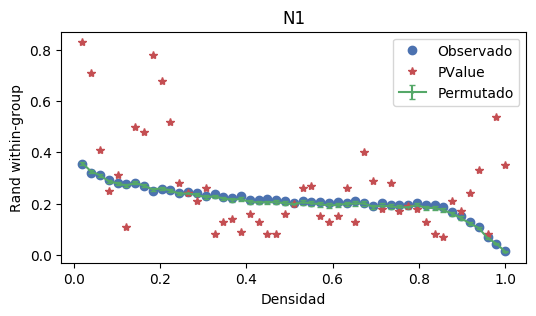

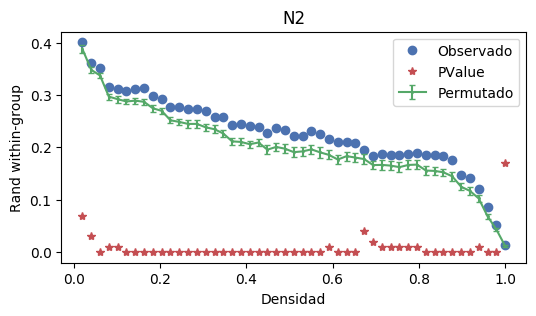

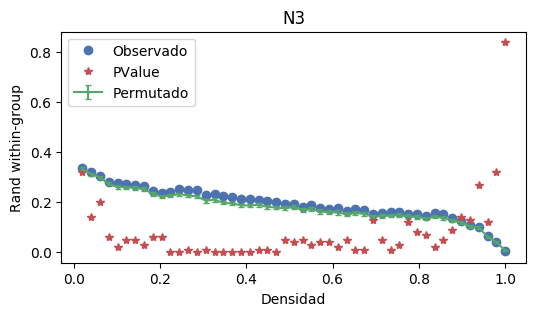

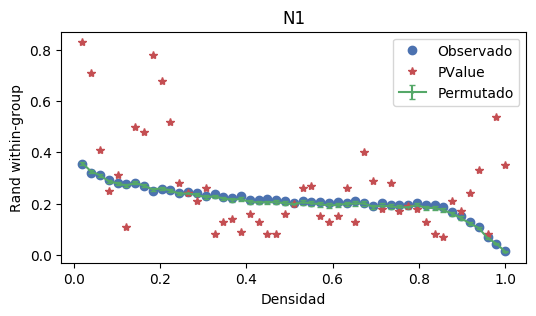

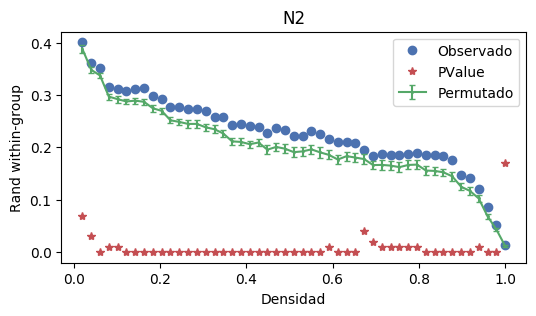

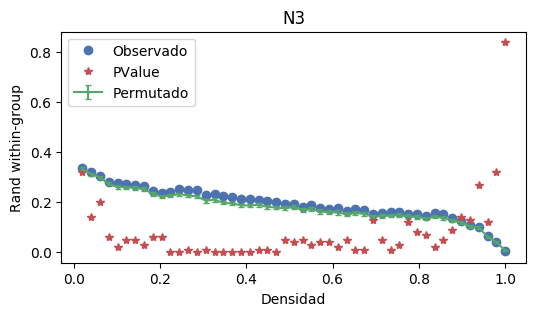

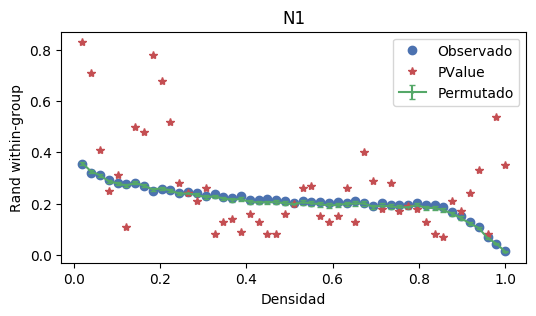

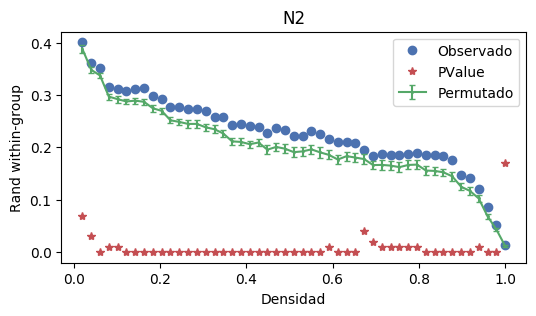

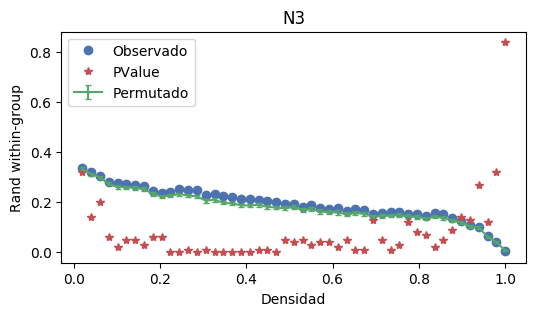

In [ ]:
#Grafico para cada estadío de sueño el rand_within_observado y el rand_within_permutado

for tipo in tipos:
    plt.figure(figsize=(6, 3))
    plt.plot(rand_within_observado[tipo][1:, 0], rand_within_observado[tipo][1:, 1], 'o')
    plt.errorbar(rand_within_permutado[tipo][1:, 0], rand_within_permutado[tipo][1:, 1], yerr=rand_within_permutado[tipo][1:, 2], marker = 's', capsize=2, markersize=1)
    plt.plot(rand_within_observado[tipo][1:, 0], rand_within_observado[tipo][1:, 2], '*')    
    plt.legend(['Observado', 'PValue', 'Permutado'])
    plt.title(tipo)
    plt.xlabel('Densidad')
    plt.ylabel('Rand within-group')
    plt.show()